In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Cleanup/Data Mining
Steps:
- To cleanup the original dataset we used mainly the dss provided recipes on it.   
- We started by first removing the Euro symbol from the *price column*  
- We average the values that were a range instead of a sinlge value in this same column by using a **pattern recipe** and a **formula recipe**  
- After this we divided the *Amazon Category and Sub Category column* to different sub columns using the **pattern recipe** to parse thorugh it and aquire all the sub categories  

From the product information column we extract various items to individual columns  
Extraction steps: We **parse** to find the: 
- Manufacturer Recommended Age
- Best Seller Rank
- Item Weight
- Assembly Required
- Batteries Required
- Batteries Included
- Shipping Weight

We then remove the *out of 5 stars* part from the Average Review Rating column to make at a float number instead of a string
All column names are then change to lower case separeted by '_'


# Data Exploration

In [3]:
# Example: load a DSS dataset as a Pandas dataframe
mydataset = dataiku.Dataset("toys_data_cleaned")
mydataset_df = mydataset.get_dataframe()
print(mydataset_df.columns)

Index(['price', 'manufacturer', 'stock_count', 'review_count', 'answer_question_count', 'average_review_rating', 'amazon_category_and_sub_category', 'sub_category_0', 'sub_category_1', 'sub_category_2', 'sub_category_3', 'sub_category_4', 'description', 'product_information', 'shipping_weight', 'assembly_required', 'batteries_included', 'batteries_required', 'item_weight', 'product_dimensions', 'best_sellers_rank', 'manufacturer_recommended_age', 'product_description', 'customer_reviews'], dtype='object')


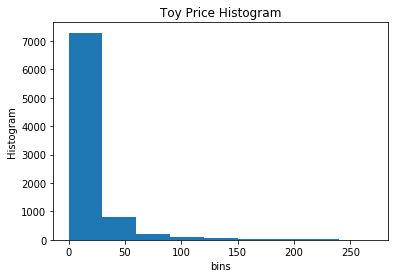

In [4]:
less_than_300 = pd.to_numeric(mydataset_df['price'] < 300)
price = mydataset_df[less_than_300]['price']
fig, ax = plt.subplots()
ax.hist(price, bins = np.arange(min(price), max(price), 30))
ax.set_xlabel('bins')
ax.set_ylabel('Histogram')
ax.set_title('Toy Price Histogram')
plt.show()

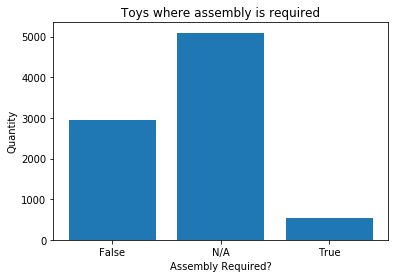

In [5]:
fig, ax = plt.subplots()
ar_false = mydataset_df['assembly_required'].value_counts()[0]
ar_true = mydataset_df['assembly_required'].value_counts()[1]
ar_Nan =size(mydataset_df['assembly_required']) - ar_true - ar_false
counts = [ar_false,ar_Nan,ar_true]
category = ['False','N/A','True']
ax.bar(category,counts)
ax.set_xlabel('Assembly Required?')
ax.set_ylabel('Quantity')
ax.set_title('Toys where assembly is required')
plt.show()

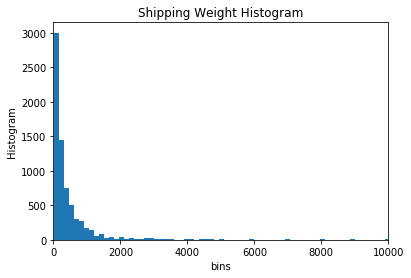

In [6]:
#mydataset_df.dropna(subset = ['shipping_weight'], inplace=True)
shipping_weights = pd.to_numeric(mydataset_df['shipping_weight'])
m = max(shipping_weights)
n = min(shipping_weights)
fig, ax = plt.subplots()
ax.hist(shipping_weights, bins = np.arange(min(shipping_weights), max(shipping_weights), 150))
ax.set_xlim(0,10000)
ax.set_xlabel('bins')
ax.set_ylabel('Histogram')
ax.set_title('Shipping Weight Histogram')
plt.show()

# Data Analytics

In [7]:
price_mean = pd.to_numeric(mydataset_df['price']).mean()
price_std = pd.to_numeric(mydataset_df['price']).std()
print('Mean: ', price_mean)
print('Standard Deviation: ',price_std)

Mean:  21.277875656742424
Standard Deviation:  99.32053759031133


In [8]:
best_sellers_rank_mean = pd.to_numeric(mydataset_df['best_sellers_rank']).mean()
best_sellers_rank_std = pd.to_numeric(mydataset_df['best_sellers_rank']).std()
print('Mean: ', best_sellers_rank_mean)
print('Standard Deviation: ',best_sellers_rank_std)

Mean:  247818.55458205068
Standard Deviation:  256793.84273489227


## Clustering
Here we perform unsupervised learning algorithms on the cleaned dataset
Only **2 features** where used for all them:
- Price
- Best Seller Rank

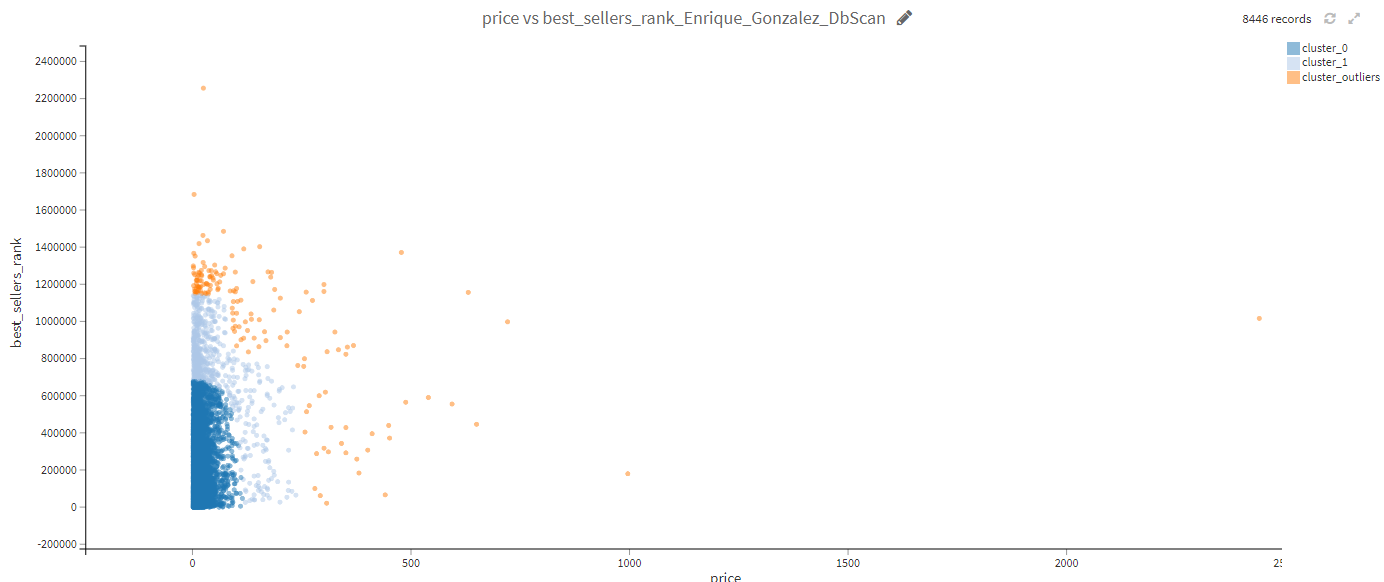
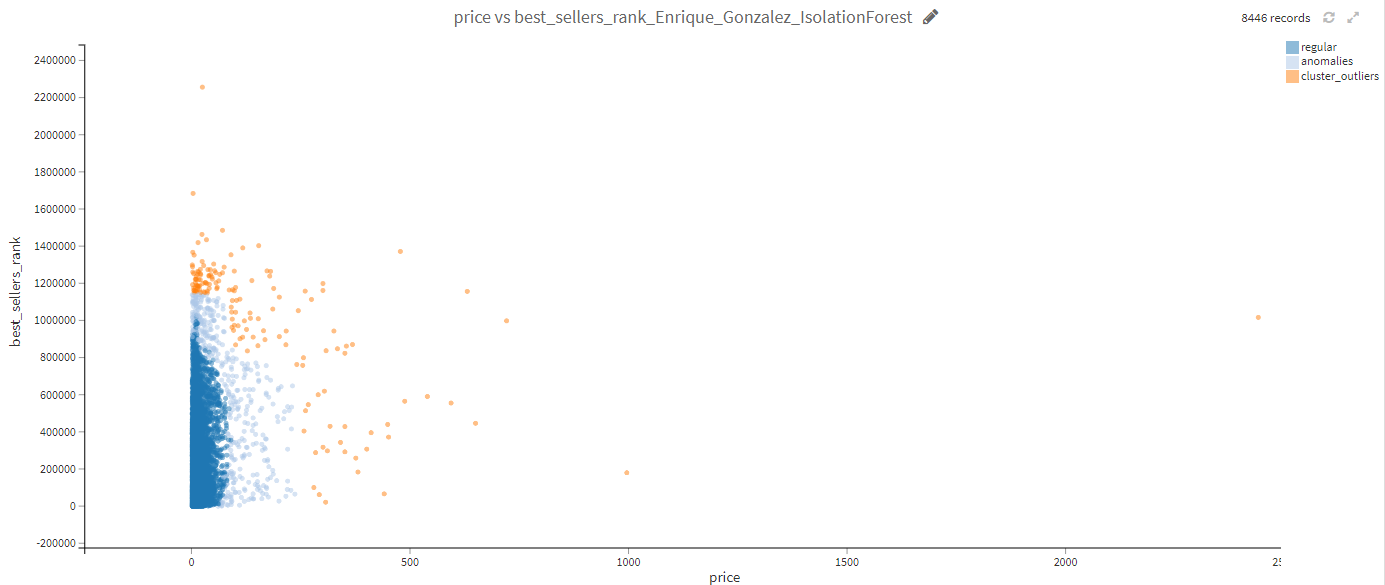
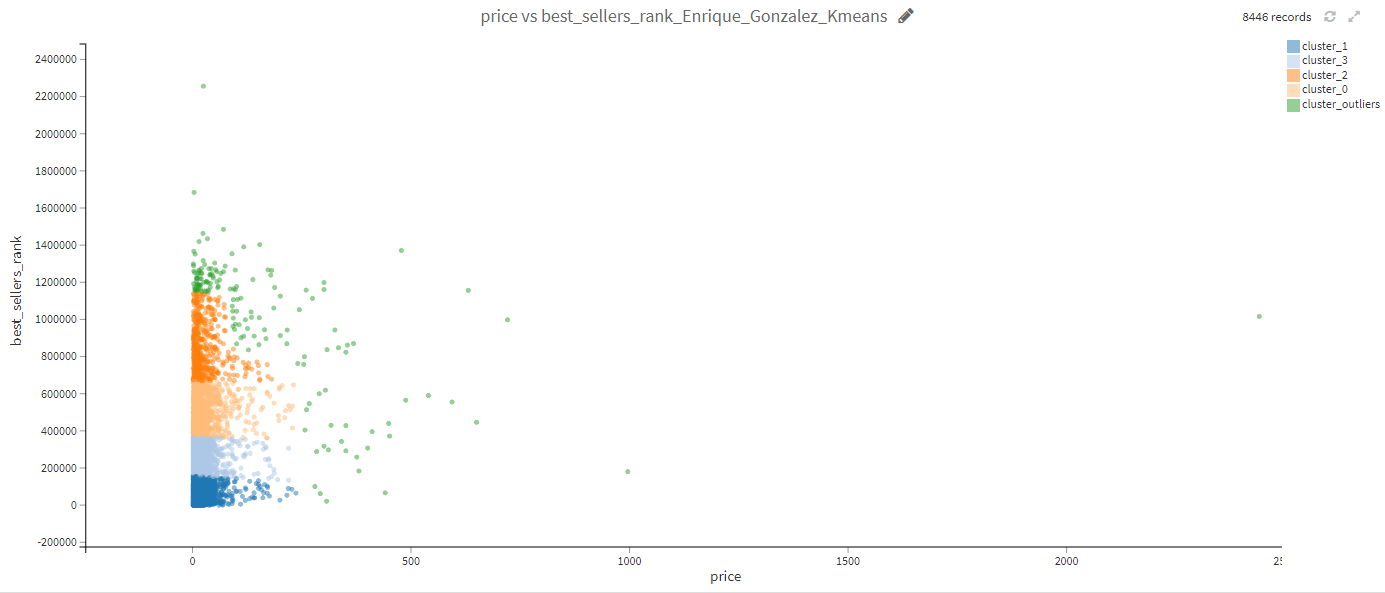

The silhouette metric of each clustering algorithm is shown below: 
- DbScan:0.62
- Isolation Forest: 0.58
- Kmeans:0.50
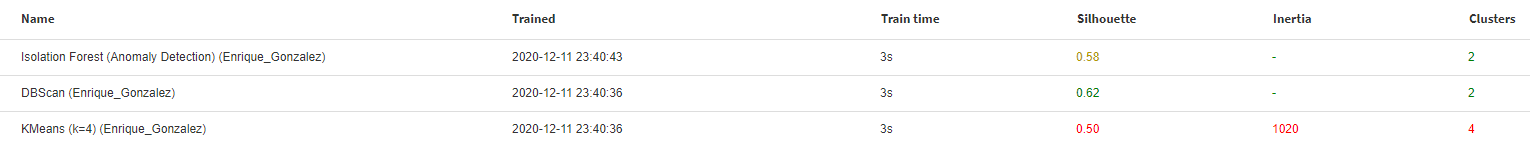


# Data Prediction
We want to predict what tpys will be the best sellers with an R2 Score of 0.40. For this, we will check and provide a supervised machine learning algorithm that provides at least the same HLA as the toy experts(0.40)

From the cleaned dataset we first selected 9 features:
- Price
- Manufacturer
- Stock Count
- Review Count
- Answer Question Count
- Average Review Rating
- Sub Category 0
- Manufacturer Recomended Age
- Best Sellers Rank (Target variable)

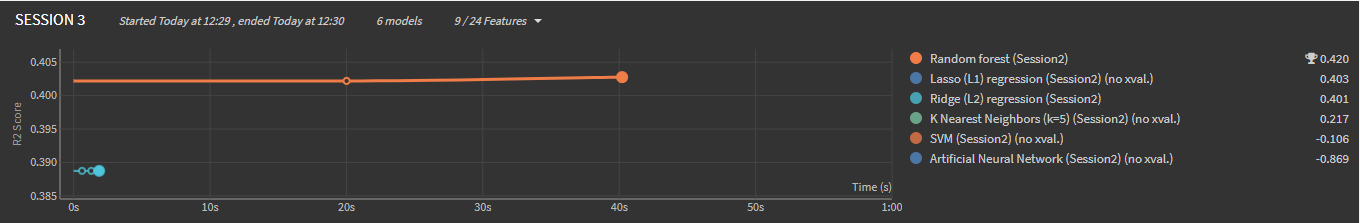

The best model was the **Random Forest** with an R2 score of **0.42**

We gave it a second run adding an extra feature (**item weight**) to see if this could increment the desired prediction score of our models

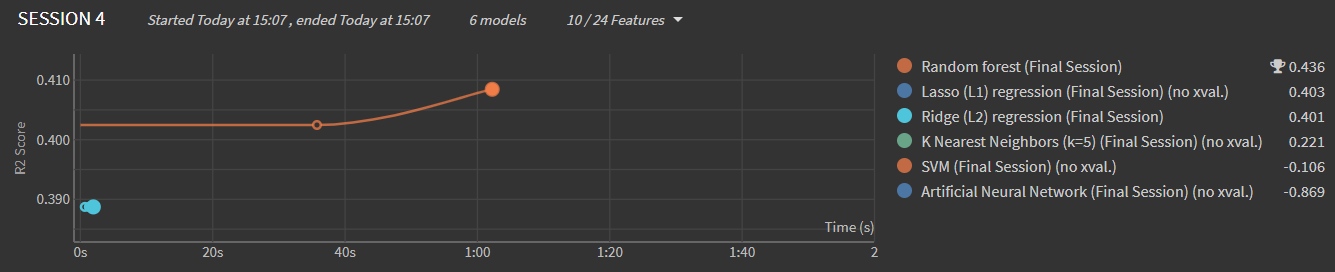

It did not change any of our models greatly apart from bumping up the **Random Forest** R2 score to **0.436**